# Laboratorium 5 - rozwiązanie
## Język R
**Paweł Kruczkiewicz**

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 **(1p.)**
4. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu. **(1p.)**
5. Dopasować **krzywą wykładniczą** do liczby zakażonych koronawirusem w Polsce. Przykładowe źródło danych w [GoogleDoc](https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview#) lub https://ourworldindata.org/explorers/coronavirus-data-explorer. Jak zmieniają się krzywe w zależności od wybranego okresu czasu. Porównać na wykresach co najmniej 2 dopasowania **(2p.)**

In [41]:
install.packages("tidyverse")

also installing the dependency 'jsonlite'



package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem z kopiowaniem C:\Users\pawel\anaconda3\envs\hahaha\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll do C:\Users\pawel\anaconda3\envs\hahaha\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pawel\AppData\Local\Temp\Rtmpu8nCZb\downloaded_packages


In [79]:
library("ggplot2")
library("dplyr")
library("readr")
library(lubridate)

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



## Zad 1
**Wczytanie danych**

Dane przedstawianją czasy działania algorytmu obliczania wektora skalarnego oraz mnożenia macierzy przez wektor.

In [3]:
measurements = read.csv("time_measurements.csv")
measurements

Rozmiar,Czas,Typ
1000,0.000681700,1
1000000,0.001094700,0
1000,0.000795300,1
1000000,0.001085000,0
1000,0.000962300,1
1000000,0.001134500,0
1000,0.000604700,1
1000000,0.001361700,0
1000,0.000679901,1
1000000,0.001065200,0


## Zad 2 i 3
**grupowanie danych**

In [4]:
grouped = measurements %>%    
    group_by(Typ, Rozmiar) %>%
    summarize(
        avg_time = mean(Czas),
        std_error = sd(Czas)
    ) %>% ungroup()
first_function_meas = grouped %>% filter(Typ == 0)
second_function_meas = grouped %>% filter(Typ == 1)

`summarise()` has grouped output by 'Typ'. You can override using the `.groups` argument.


**rysowanie wykresów**

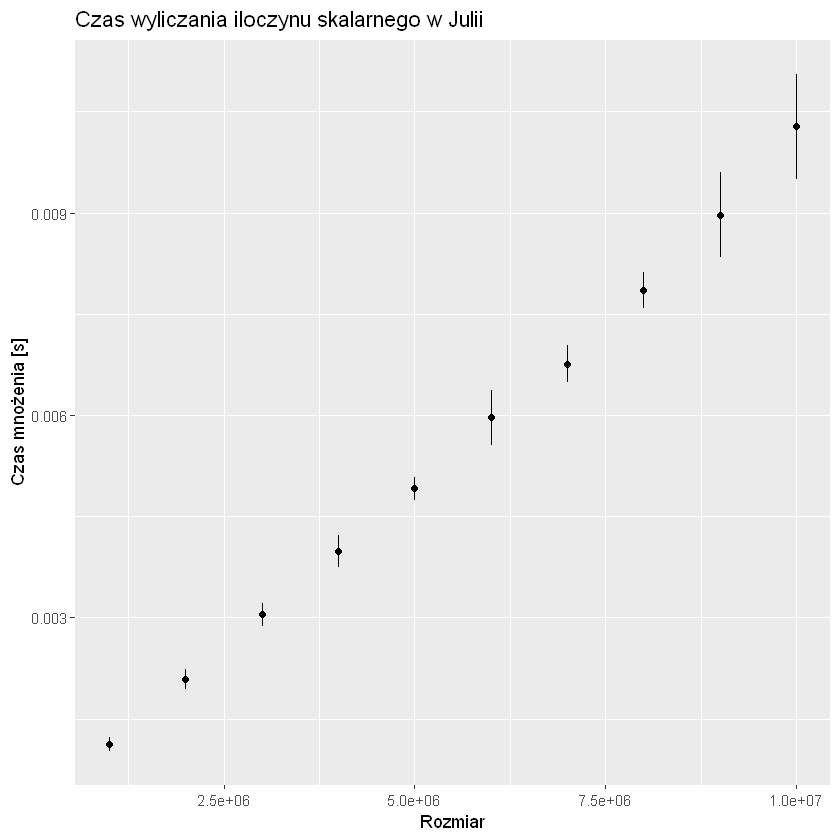

In [5]:
first_plot = first_function_meas %>%
    ggplot(aes(x = Rozmiar, y= avg_time)) + geom_point() + 
        geom_errorbar(aes(ymin = avg_time-std_error, ymax = avg_time+std_error, width=.25)) +
    ggtitle("Czas wyliczania iloczynu skalarnego w Julii")  + ylab("Czas mnożenia [s]")

first_plot

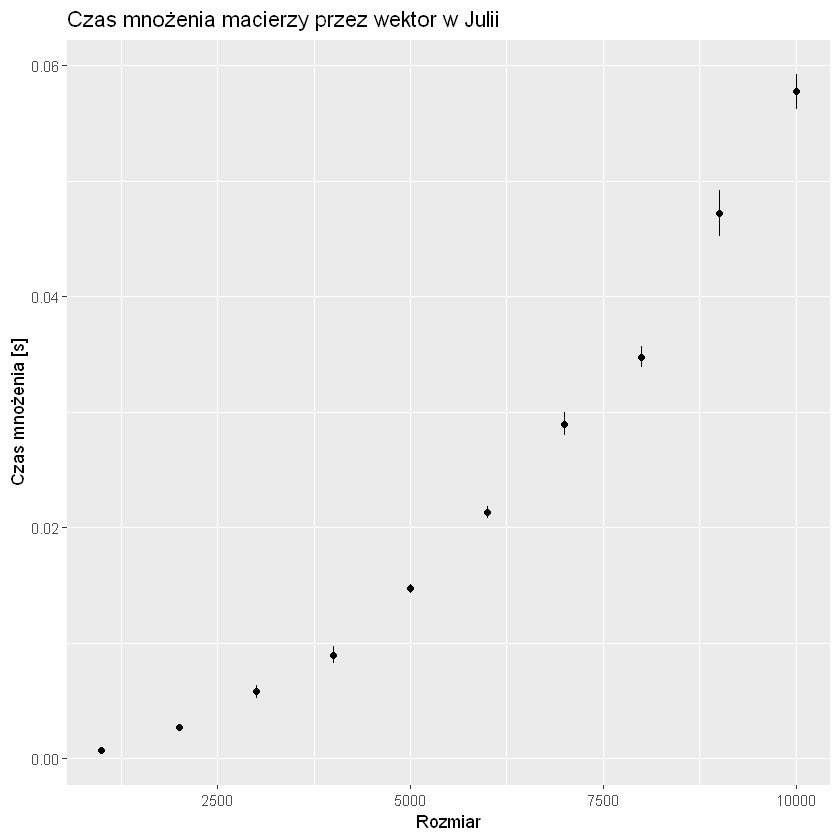

In [7]:
second_plot = second_function_meas %>%
    ggplot(aes(x = Rozmiar, y= avg_time)) + geom_point() + 
        geom_errorbar(aes(ymin = avg_time-std_error, ymax = avg_time+std_error, width=.25)) +
    ggtitle("Czas mnożenia macierzy przez wektor w Julii") + ylab("Czas mnożenia [s]")
second_plot

## Zad 4
**pierwszy wykres**

In [37]:
fit <- lm(avg_time ~ poly(Rozmiar, 1, raw=TRUE), data=first_function_meas)  # Wyliczanie iloczynu jest liniowe

In [35]:
newdata = data.frame(Rozmiar 
                     = seq(100000, 10000000, length.out=250))

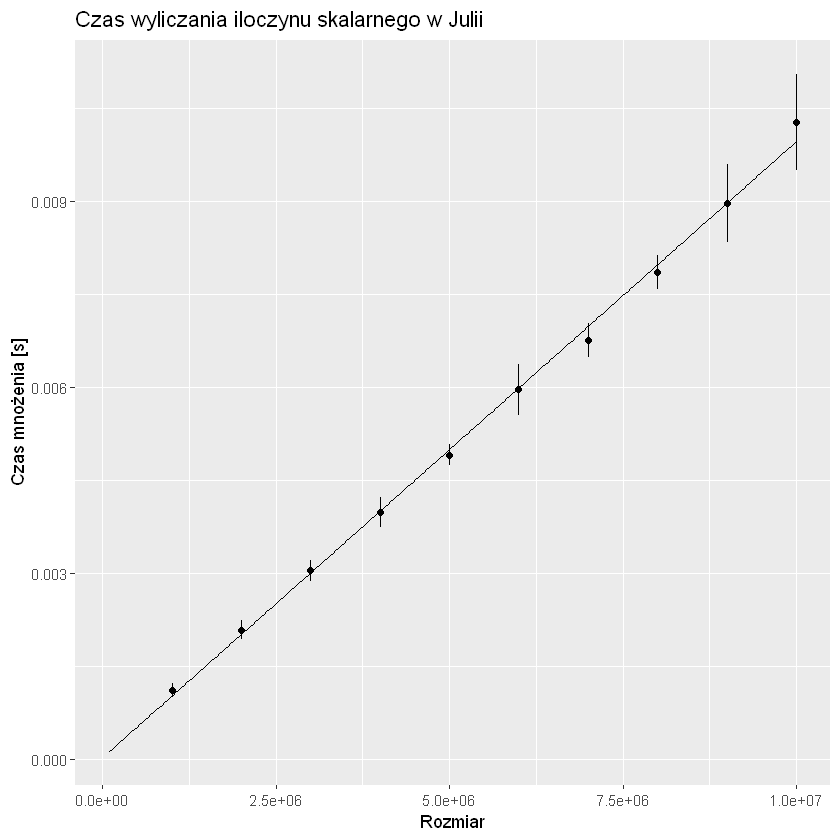

In [36]:
newdata$y = predict(fit, newdata)
first_plot + geom_line(data=newdata, aes(Rozmiar, y))

**Drugi wykres**


In [39]:
fit2 <- lm(avg_time ~ poly(Rozmiar, 2, raw=TRUE), data=second_function_meas)
newdata = data.frame(Rozmiar = seq(1000, 10000, length.out=250))

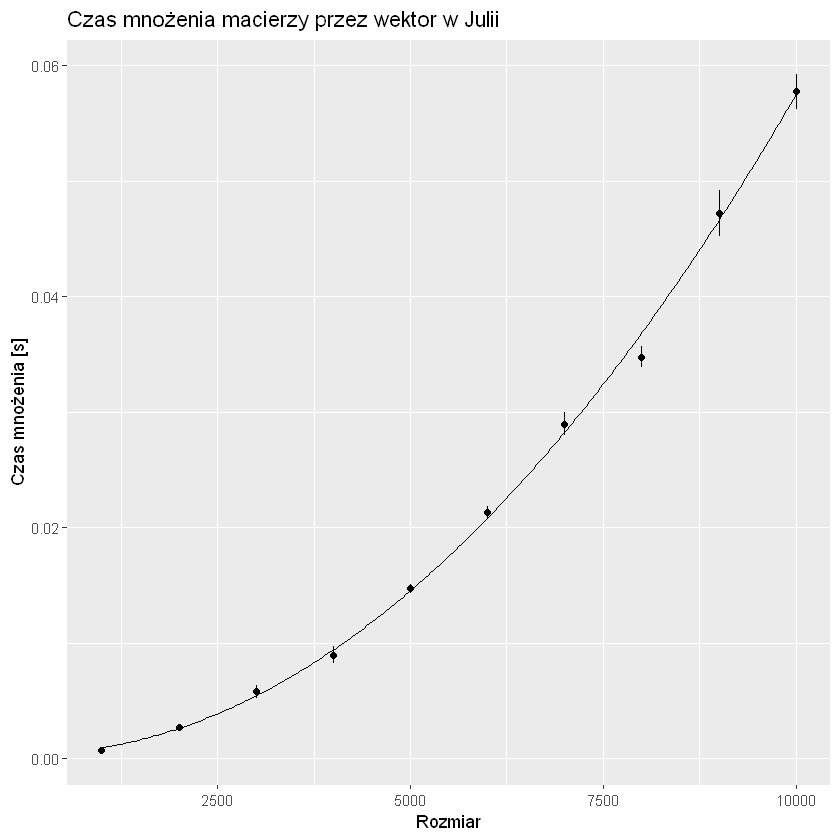

In [40]:
newdata$y = predict(fit2, newdata)
second_plot + geom_line(data=newdata, aes(Rozmiar, y))

## Zad 5

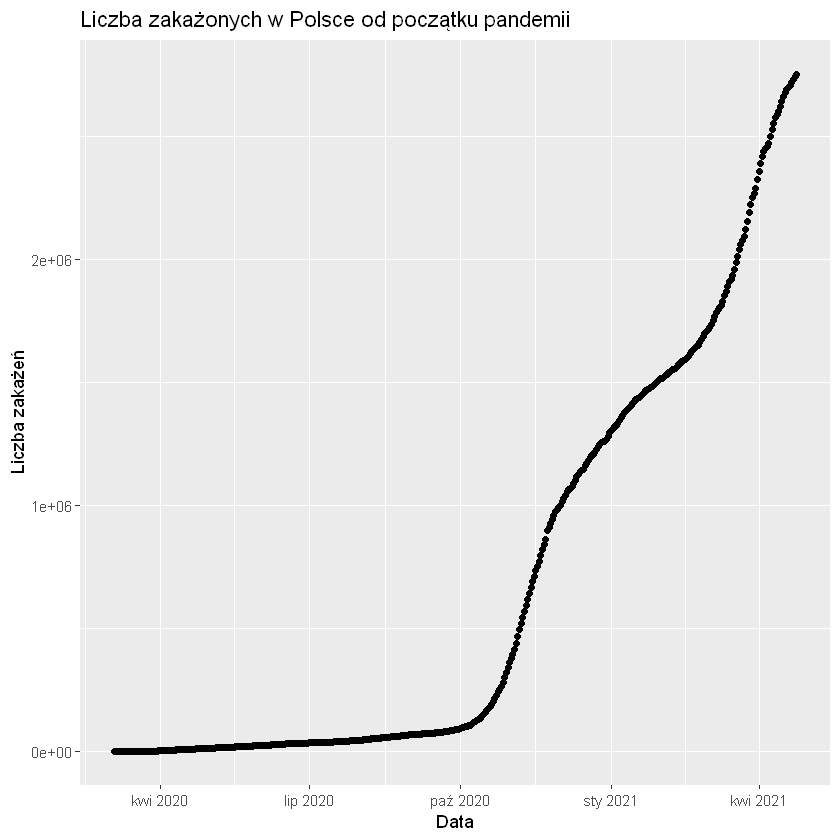

In [155]:
covid_poland = read.csv("zakazeniaCovid.csv")
segregated_data = covid_poland %>%
    mutate(Date = dmy(Data), No_infections= as.numeric(as.character(Liczba_zakazen)))%>%
    select(Date, No_infections)

segregated_data %>%
ggplot(aes(x = Date, y= No_infections)) + geom_point() + ggtitle("Liczba zakażonych w Polsce od początku pandemii") +
xlab("Data") + ylab("Liczba zakażeń")



**Pierwszy okres**

14 dni w okolicach początku pandemii w Polsce

In [136]:
n_1 = 14

start_1 = dmy("24-03-2020")
stop_1 = start_1 + days(n_1)

filtered_data_1 = segregated_data %>%
    filter(start_1 <= Date & Date < stop_1) %>%
    mutate(Days_since_start=as.integer(difftime(Date, start_1, units="days")))

filtered_data_1

Date,No_infections,Days_since_start
2020-03-24,901,0
2020-03-25,1051,1
2020-03-26,1221,2
2020-03-27,1389,3
2020-03-28,1638,4
2020-03-29,1862,5
2020-03-30,2055,6
2020-03-31,2311,7
2020-04-01,2554,8
2020-04-02,2946,9


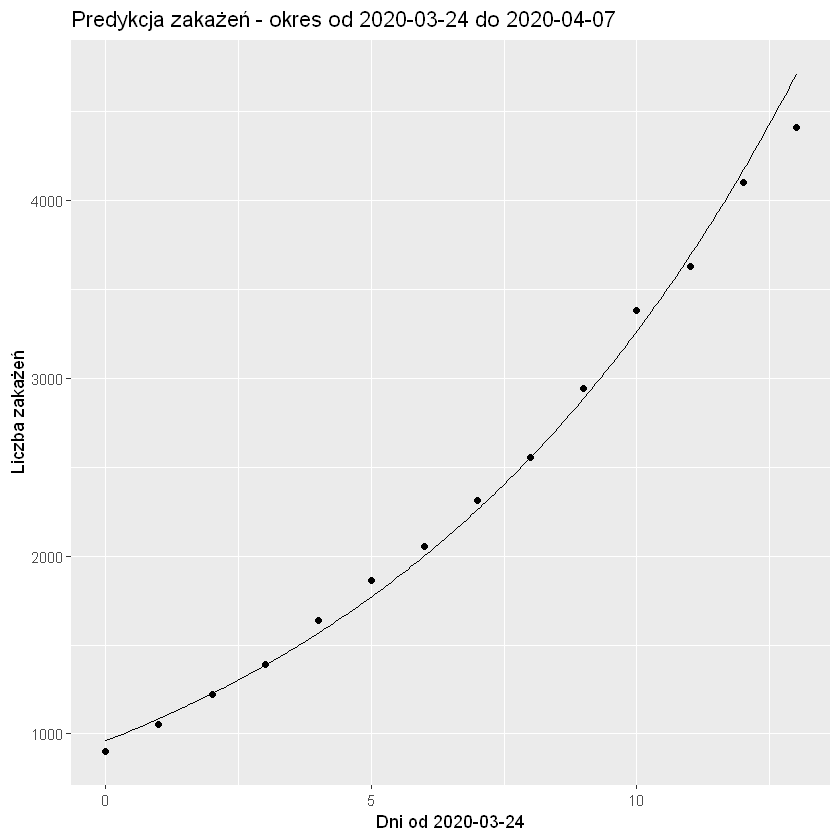

In [152]:
exponentional_fit = lm(log(No_infections)~ Days_since_start, data=filtered_data_1)
df_points_1 = data.frame(Days_since_start = seq(0, n_1-1, length.out=250))

df_points_1$yfs_1 <- exp(predict(exponentional_fit, df_points_1))

filtered_data_1 %>%
    ggplot(aes(x = Days_since_start, y= No_infections)) + geom_point() +
    geom_line(data=df_points_1, aes(Days_since_start, yfs_1)) +
    ggtitle(sprintf("Predykcja zakażeń - okres od %s do %s", start_1, stop_1)) +
    xlab(sprintf("Dni od %s", start_1)) + ylab("Liczba zakażeń")

**Second period**

October of 2020 with a big peek in number of infections

In [153]:
n_2 = 30

start_2 = dmy("01-10-2020")
stop_2 = start_2 + days(n_2)

filtered_data_2 = segregated_data %>%
    filter(start_2 <= Date & Date < stop_2) %>%
    mutate(Days_since_start=as.integer(difftime(Date, start_2, units="days")))

filtered_data_2

Date,No_infections,Days_since_start
2020-10-01,93481,0
2020-10-02,95773,1
2020-10-03,98140,2
2020-10-04,100074,3
2020-10-05,102080,4
2020-10-06,104316,5
2020-10-07,107319,6
2020-10-08,111599,7
2020-10-09,116338,8
2020-10-10,121638,9


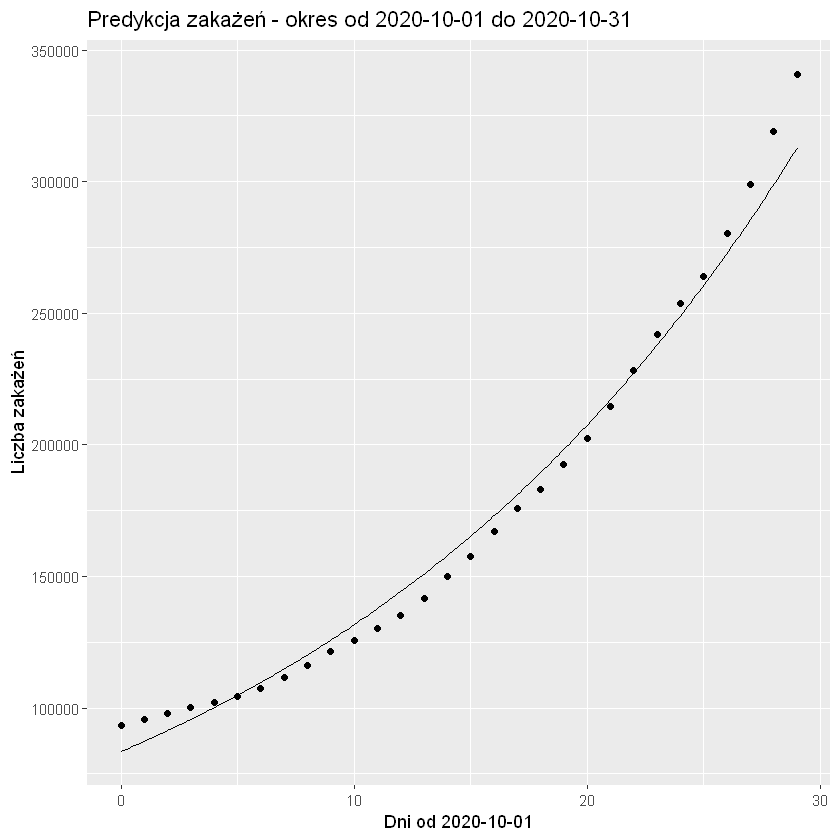

In [154]:
exponentional_fit_2 = lm(log(No_infections)~ Days_since_start, data=filtered_data_2)
df_points_2 = data.frame(Days_since_start = seq(0, n_2-1, length.out=250))

df_points_2$yfs_2 <- exp(predict(exponentional_fit_2, df_points_2))

filtered_data_2 %>%
    ggplot(aes(x = Days_since_start, y= No_infections)) + geom_point() +
    geom_line(data=df_points_2, aes(Days_since_start, yfs_2)) + 
    ggtitle(sprintf("Predykcja zakażeń - okres od %s do %s", start_2, stop_2)) +
    xlab(sprintf("Dni od %s", start_2)) + ylab("Liczba zakażeń")